In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
dataset = pd.read_csv('IMDB_train.csv')

In [3]:
dataset

,text,label
0,"Beautifully photographed and ably acted, gener...",0
1,"Well, where to start describing this celluloid...",0
2,I first caught the movie on its first run on H...,1
3,I love Umberto Lenzi's cop movies -- ROME ARME...,0
4,I generally won't review movies I haven't seen...,0
...,...,...
35995,"speaking solely as a movie, i didn't really li...",0
35996,This film plays like a demented episode of VH1...,0
35997,A couple of teenagers have a little sex on the...,0
35998,Good things out of the way first:<br /><br />U...,0


In [4]:
dataset.head()


,text,label
0,"Beautifully photographed and ably acted, gener...",0
1,"Well, where to start describing this celluloid...",0
2,I first caught the movie on its first run on H...,1
3,I love Umberto Lenzi's cop movies -- ROME ARME...,0
4,I generally won't review movies I haven't seen...,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    36000 non-null  object
 1   label   36000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 562.6+ KB


In [6]:
dataset.isnull().sum()


text     0
label    0
dtype: int64

In [7]:
X = dataset['text']
y = dataset['label']

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2,random_state=42,stratify = y)

In [8]:
tfidf = TfidfVectorizer(stop_words='english', max_features = 20000, ngram_range = (1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

In [9]:
#Naive Bayes

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [10]:
nb_preds = nb_model.predict(X_val_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_val, nb_preds))
print("\nClassification Report:\n", classification_report(y_val, nb_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, nb_preds))

Naive Bayes Accuracy: 0.8702777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      3589
           1       0.86      0.88      0.87      3611

    accuracy                           0.87      7200
   macro avg       0.87      0.87      0.87      7200
weighted avg       0.87      0.87      0.87      7200


Confusion Matrix:
 [[3081  508]
 [ 426 3185]]


In [11]:
#Logistic Regression
lr_model = LogisticRegression(max_iter=1000, solver='liblinear')
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [12]:
lr_preds = lr_model.predict(X_val_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_val, lr_preds))
print("\nClassification Report:\n", classification_report(y_val, lr_preds))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, lr_preds))

Logistic Regression Accuracy: 0.8926388888888889

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      3589
           1       0.88      0.91      0.89      3611

    accuracy                           0.89      7200
   macro avg       0.89      0.89      0.89      7200
weighted avg       0.89      0.89      0.89      7200


Confusion Matrix:
 [[3158  431]
 [ 342 3269]]


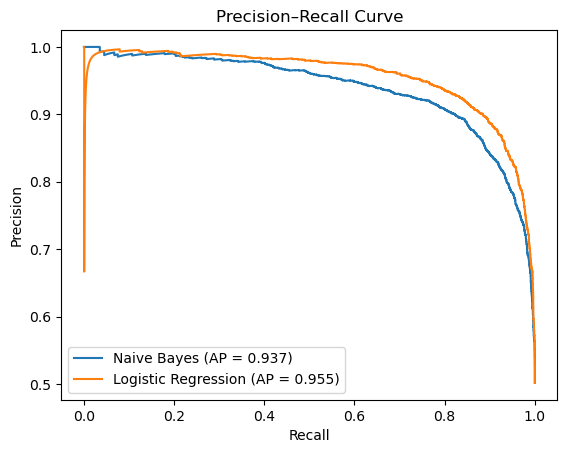

()

In [13]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

nb_probs = nb_model.predict_proba(X_val_tfidf)[:, 1]
lr_probs = lr_model.predict_proba(X_val_tfidf)[:, 1]

# Precision–Recall curves
nb_prec, nb_rec, _ = precision_recall_curve(y_val, nb_probs)
lr_prec, lr_rec, _ = precision_recall_curve(y_val, lr_probs)

# Average Precision (PR AUC)
nb_ap = average_precision_score(y_val, nb_probs)
lr_ap = average_precision_score(y_val, lr_probs)

plt.figure()
plt.plot(nb_rec, nb_prec, label=f"Naive Bayes (AP = {nb_ap:.3f})")
plt.plot(lr_rec, lr_prec, label=f"Logistic Regression (AP = {lr_ap:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.show()
()

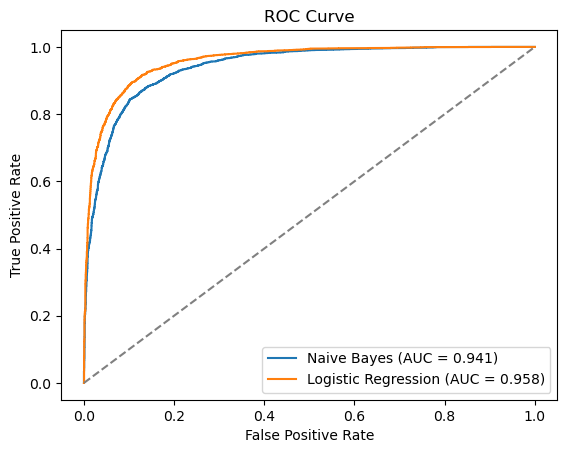

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC curve values (ignore thresholds with _)
nb_fpr, nb_tpr, _ = roc_curve(y_val, nb_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_val, lr_probs)

# AUC scores
nb_auc = roc_auc_score(y_val, nb_probs)
lr_auc = roc_auc_score(y_val, lr_probs)

plt.figure()
plt.plot(nb_fpr, nb_tpr, label=f"Naive Bayes (AUC = {nb_auc:.3f})")
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [15]:
def predict_review(text):
    vec = tfidf.transform([text])
    nb = nb_model.predict(vec)[0]
    lr = lr_model.predict(vec)[0]

    return {
        "Naive Bayes": "Positive" if nb == 1 else "Negative",
        "Logistic Regression": "Positive" if lr == 1 else "Negative"
    }

predict_review("The movie was absolutely fantastic with brilliant acting")

{'Naive Bayes': 'Positive', 'Logistic Regression': 'Positive'}